In [2]:
import sys
sys.path.append('..')
import init

STBX not loaded: No module named 'pandas'
init loaded


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import rasterio
import cv2

ModuleNotFoundError: No module named 'rasterio'

In [34]:
batch_images = []

with rasterio.open('/home/cb/sis2/data/tif256/00271_9669x2622.tif') as dataset:
    image = dataset.read([3, 4, 5])  # Read channels 2, 3, and 4
    image = image.transpose((1, 2, 0))  # Transpose to (height, width, channels)
    # image_resized = cv2.resize(image, (256, 256))
    batch_images.append(image)

In [35]:
batch_images[0].max()

8100.0

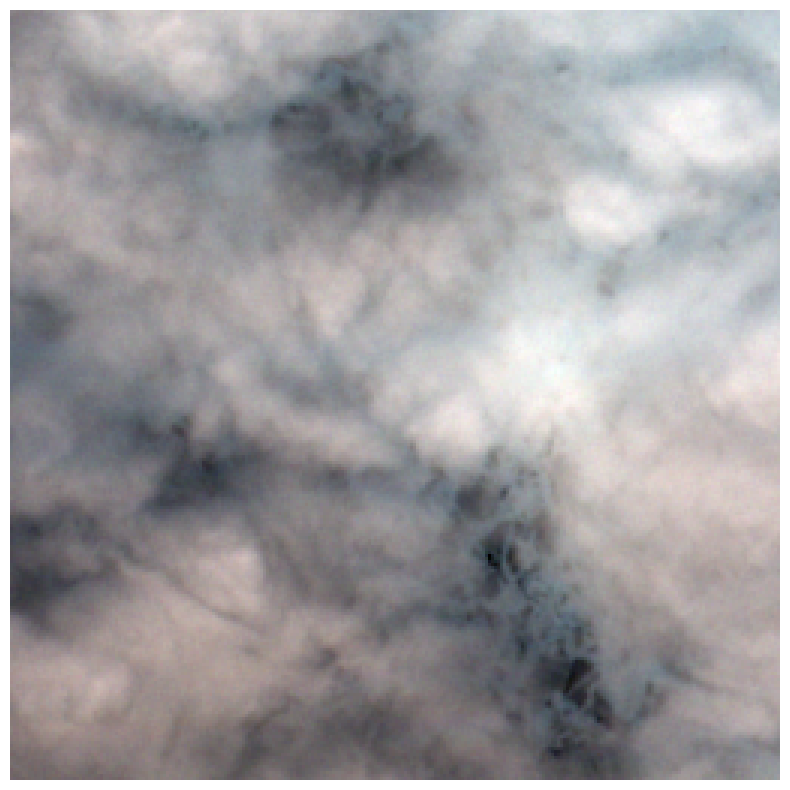

In [36]:
import numpy as np
from matplotlib import pyplot as plt

red_band = sis_toolbox.normalize_numpy(batch_images[0][:,:,2])
green_band = sis_toolbox.normalize_numpy(batch_images[0][:,:,1])
blue_band = sis_toolbox.normalize_numpy(batch_images[0][:,:,0])

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


In [47]:
import os
import sys
sys.path.append('/home/cb/sis2/')
from dataset.reader import Reader

data_dir = '/home/cb/sis2/data/tfrecords256/'
tfrecord_files = [f for f in os.listdir(data_dir) if f.endswith('.tfrecord')]
num_samples = len(tfrecord_files)
print(f'{num_samples} samples')

dataset = Reader(256, 256, 256, '/home/cb/sis2/data/tfrecords256/', '/home/cb/sis2/data/tfrecords256_val/', num_samples, 3, True)

12702 samples


In [48]:
mydata = dataset.train_dataset.repeat()

In [49]:
x = mydata.take(1)
y = mydata.take(1)
z = mydata.take(1)
x == y

2023-07-10 11:02:48.093551: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


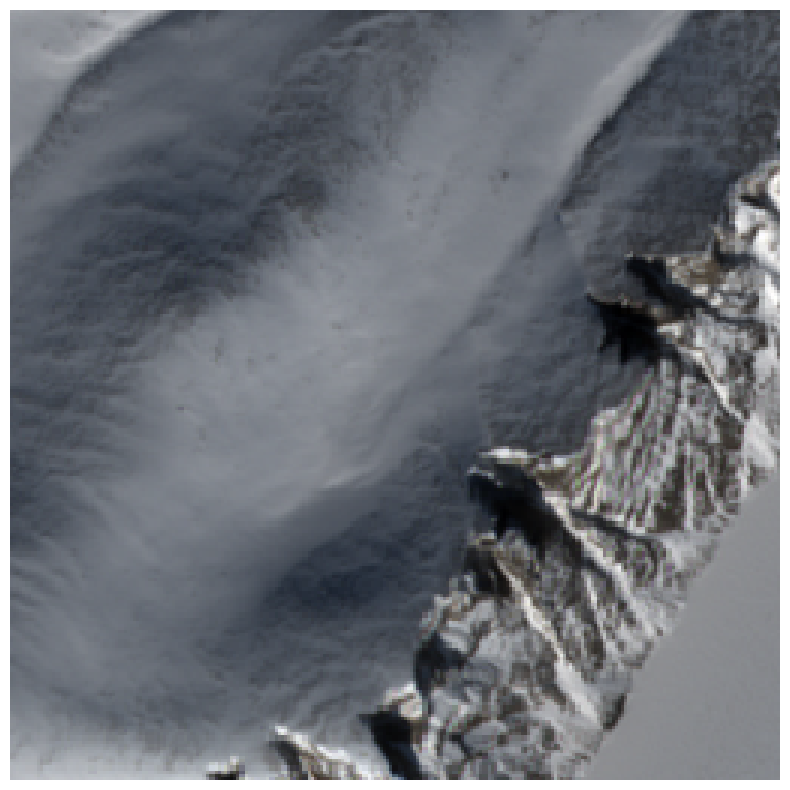

In [51]:
import sis_toolbox as tbx
from sis_toolbox import RGBProfile as rgb

for step, (target, input_image) in x.enumerate():
    # print(target[0])
    tbx.plot_tensor(target[0], rgb.S2)

2023-07-10 11:03:13.654325: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


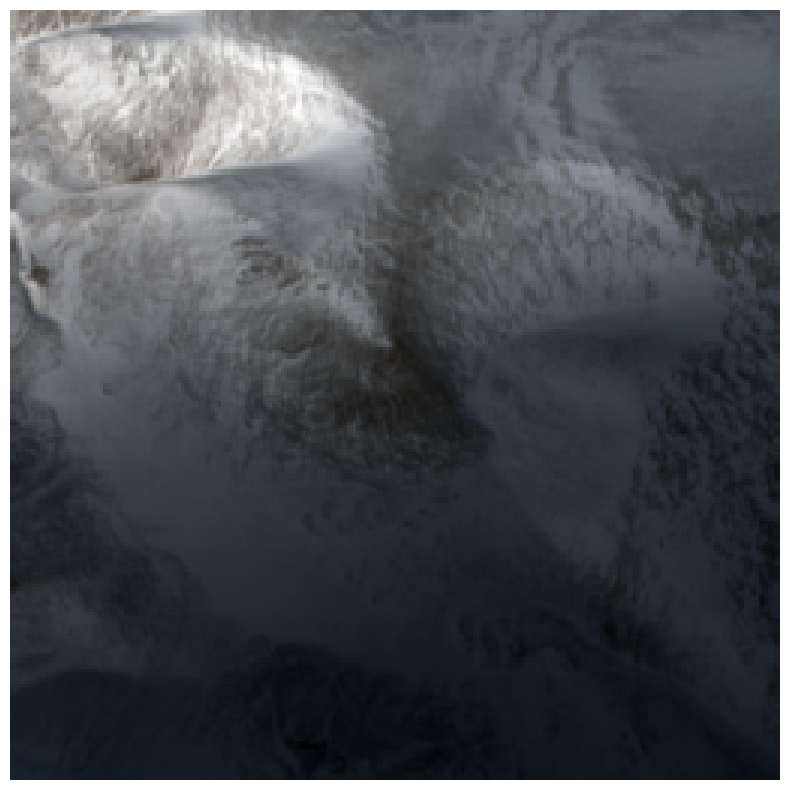

In [52]:
for step, (target, input_image) in y.enumerate():
    # print(target[0])
    tbx.plot_tensor(target[0], rgb.S2)

In [57]:
z = mydata.take(1)
for step, (target, input_image) in z.enumerate():
    print(len(target))
    # tbx.plot_tensor(target[0], rgb.S2)
zz = next(iter(mydata))
zz[0].shape
# tbx.plot_tensor(zz[0], rgb.S2)

2023-07-10 11:04:47.782336: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


3


TensorShape([3, 256, 256, 3])

In [56]:
type(zz[1])

tensorflow.python.framework.ops.EagerTensor